*ML researchers work either at universities (”academia”) or in private companies (”industry”).
Official statistics shows that every year, 20% of academic workers transition to industry, while only 1%
moves from industry to academia. How will this distribution evolve over years? In this task, you will
answer this question using a simple model.*

*We can collect the information we have into a single matrix T, where the first column and the first row
correspond to industry, while the second column and the second row are related to academia:*



industry | Academy
------------ | -------------
0.99 | 0.2
0.01 | 0.8


*You can read this matrix as follows:
• first column: 0.99 of ML researchers in industry stay there, while 0.01 transition to academia;
• second column: 0.2 of the academic researchers transition to industry, while the remaining 0.8 stays
in academia.
Suppose that in some year 0, there were x
industry
0
researchers working in industry and x
academia
0 academic
researchers. Given the statistics above, we can then estimate industry vs. academia research distribution
next year as follows:*

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrix
T = np.array([[0.99, 0.2],
              [0.01, 0.8]])

(a) (2 points) Imagine that in 2024, 30% of the ML researchers work in industry, while 70% work
in academia. How will this distribution be changing over the next 100 years (assuming that the
transition matrix stays the same)?
Make a plot to visualize industry vs. academia researchers distribution for each year from 2023 up
to 2124 according to our model. Explain what you see.

In [15]:

# Initial distribution in 2024
x0 = np.array([0.3, 0.7]).T

# Prepare arrays to store results
years = np.arange(2024, 2125) # years  
distribution = np.zeros((len(years), 2))
distribution[0] = x0 # shape(101, 2))
distribution[:3]


array([[0.3, 0.7],
       [0. , 0. ],
       [0. , 0. ]])

In [21]:
# Calculate distribution for the next 100 years
for i in range(1, len(years)):
    distribution[i] = T @ distribution[i - 1] 
    # print(i, T @ distribution[i - 1])

In [17]:
distribution[:5]

array([[0.3       , 0.7       ],
       [0.437     , 0.563     ],
       [0.54523   , 0.45477   ],
       [0.6307317 , 0.3692683 ],
       [0.69827804, 0.30172196]])

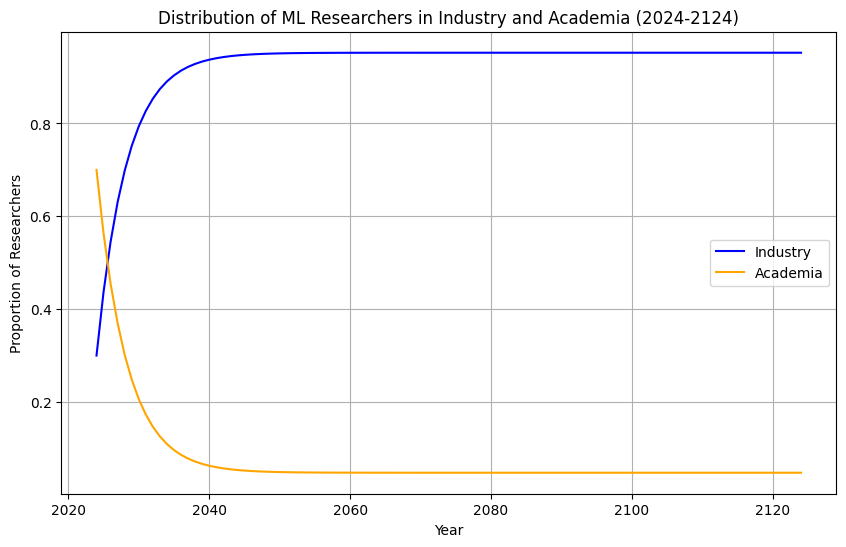

In [23]:
# Plotting the results
def plot_distribution(distribution, years):

    plt.figure(figsize=(10, 6))
    plt.plot(years, distribution[:, 0], label='Industry', color='blue')
    plt.plot(years, distribution[:, 1], label='Academia', color='orange')
    plt.title('Distribution of ML Researchers in Industry and Academia (2024-2124)')
    plt.xlabel('Year')
    plt.ylabel('Proportion of Researchers')
    plt.legend()
    plt.grid()
    plt.show()

plot_distribution(distribution, years)


*We can see proportions of researchers in industry and academia stabilize after while.*

(b) (1 point) In some alternative universe, in 2024, the statistics look different: 90% of the researchers
work in academia and only 10% are in industry. What will the distribution between industry and
academia research be by 2124 in that case? How does it compare to the previous result?

In [24]:
x0_a = np.array([0.1, 0.9])

# Prepare arrays to store results
distribution_alt = np.zeros((len(years), 2))
distribution_alt[0] = x0_a
# Calculate distribution for the next 100 years
for i in range(1, len(years)):
    distribution_alt[i] = T @ distribution_alt[i - 1] 
    

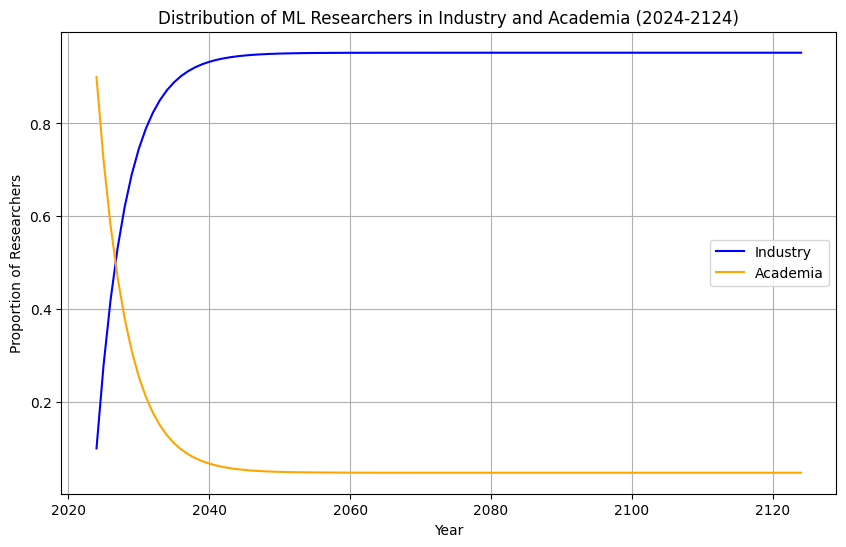

In [25]:
plot_distribution(distribution_alt, years)


 *We can see proportions of researchers in industry and academia stabilize after while too, but we can see different proportions between industry and academia than the previous case*

(c) (2 points) Compute eigenvalues and eigenvectors of the transition matrix T and note that one of the
eigenvalues is equal to 1. How is this (and the corresponding eigenvector) related to the evolution
of the industry vs. academia research distribution that you have observed in the previous task?
Explain.

In [28]:
eigenvalues, eigenvectors = np.linalg.eig(T)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [1.   0.79]
Eigenvectors: [[ 0.99875234 -0.70710678]
 [ 0.04993762  0.70710678]]


 One eigenvalue is 1. Most likely, this tells us about a stable distribution of the evolution